In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn import metrics
plt.style.use("ggplot")

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
# Fetch historical stock price data for Apple (AAPL)
symbol = 'AAPL'
start_date = '2021-01-01'
end_date = '2023-5-31'

# Retrieve the data from Yahoo Finance
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.503624,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.080093,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.735039,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.991394,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.104767,105158200


In [5]:
# Reset index and make 'Date' a regular column
df.reset_index(inplace=True)


In [6]:
df[df["Date"].duplicated(keep = False)]

,Date,Open,High,Low,Close,Adj Close,Volume


In [7]:
df = df[~df["Date"].duplicated()]

In [8]:
df.index = pd.to_datetime(df["Date"])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-01-04,2021-01-04,133.520004,133.610001,126.760002,129.410004,127.503624,143301900
2021-01-05,2021-01-05,128.889999,131.740005,128.429993,131.009995,129.080093,97664900
2021-01-06,2021-01-06,127.720001,131.050003,126.379997,126.599998,124.735039,155088000
2021-01-07,2021-01-07,128.360001,131.630005,127.860001,130.919998,128.991394,109578200
2021-01-08,2021-01-08,132.429993,132.630005,130.229996,132.050003,130.104767,105158200


In [9]:
df.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19',
               '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25',
               '2023-05-26', '2023-05-30'],
              dtype='datetime64[ns]', name='Date', length=605, freq=None)

<Axes: xlabel='Date'>

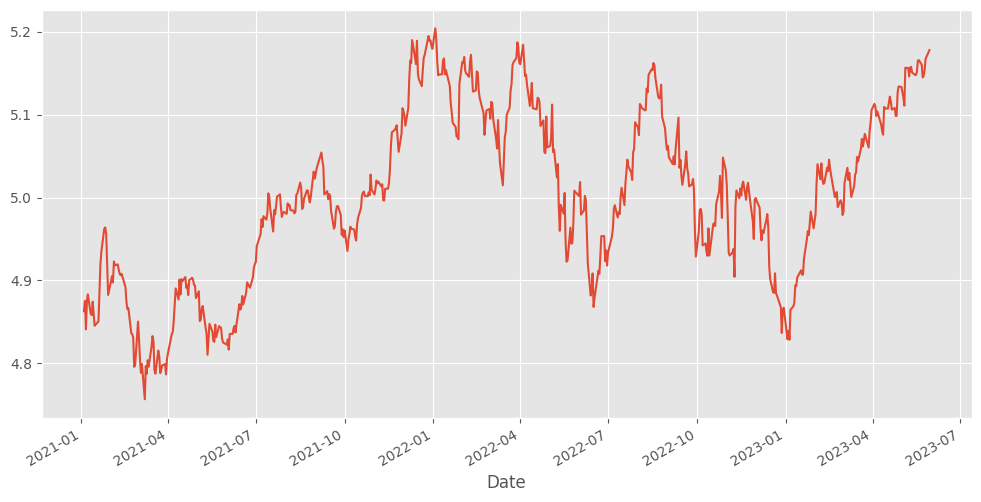

In [10]:
y = np.log(df["Close"])
y.plot()

In [11]:
y.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19',
               '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25',
               '2023-05-26', '2023-05-30'],
              dtype='datetime64[ns]', name='Date', length=605, freq=None)

In [12]:
list(y.index[:10])

[Timestamp('2021-01-04 00:00:00'),
 Timestamp('2021-01-05 00:00:00'),
 Timestamp('2021-01-06 00:00:00'),
 Timestamp('2021-01-07 00:00:00'),
 Timestamp('2021-01-08 00:00:00'),
 Timestamp('2021-01-11 00:00:00'),
 Timestamp('2021-01-12 00:00:00'),
 Timestamp('2021-01-13 00:00:00'),
 Timestamp('2021-01-14 00:00:00'),
 Timestamp('2021-01-15 00:00:00')]

In [13]:
y.asfreq("D")[:15]

Date
2021-01-04    4.862986
2021-01-05    4.875274
2021-01-06    4.841032
2021-01-07    4.874586
2021-01-08    4.883181
2021-01-09         NaN
2021-01-10         NaN
2021-01-11    4.859657
2021-01-12    4.858261
2021-01-13    4.874357
2021-01-14    4.859115
2021-01-15    4.845289
2021-01-16         NaN
2021-01-17         NaN
2021-01-18         NaN
Freq: D, Name: Close, dtype: float64

In [14]:
y.asfreq("D", method="ffill")[:15]

Date
2021-01-04    4.862986
2021-01-05    4.875274
2021-01-06    4.841032
2021-01-07    4.874586
2021-01-08    4.883181
2021-01-09    4.883181
2021-01-10    4.883181
2021-01-11    4.859657
2021-01-12    4.858261
2021-01-13    4.874357
2021-01-14    4.859115
2021-01-15    4.845289
2021-01-16    4.845289
2021-01-17    4.845289
2021-01-18    4.845289
Freq: D, Name: Close, dtype: float64

In [15]:
y = y.asfreq("B")
y.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-22',
               '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26',
               '2023-05-29', '2023-05-30'],
              dtype='datetime64[ns]', name='Date', length=627, freq='B')

In [16]:
pd.DataFrame(dict(low=y.resample("Q").min(),
                  high=y.resample("Q").max(),
                  first = y.resample("Q").first(),
                  last = y.resample("Q").last(),
                  median = y.resample("Q").median(),
                  mean = y.resample("Q").mean()
                 ))

,low,high,first,last,median,mean
Date,,,,,,
2021-03-31,4.756689,4.963963,4.862986,4.805250,4.850701,4.853472
2021-06-30,4.810313,4.919689,4.812184,4.919689,4.865532,4.863774
2021-09-30,4.921950,5.054269,4.921950,4.952300,4.989173,4.991649
2021-12-31,4.935481,5.194789,4.960394,5.179365,5.024072,5.059625
2022-03-31,5.014760,5.204062,5.204062,5.162555,5.129188,5.124087
2022-06-30,4.867996,5.184252,5.160835,4.917935,5.002435,5.016527
2022-09-30,4.928702,5.162211,4.933970,4.928702,5.047159,5.054213
2022-12-31,4.836599,5.048188,4.958991,4.866996,4.968076,4.961122
2023-03-31,4.828474,5.105339,4.828874,5.105339,5.014162,4.991938


In [17]:
period = 3
y_rolling = pd.DataFrame(dict(actual = y,
                              rolling_mean = y.rolling(period).mean(),
                              ewm = y.ewm(span = period).mean()
                             ))
y_rolling.head(10)

,actual,rolling_mean,ewm
Date,,,
2021-01-04,4.862986,NaN,4.862986
2021-01-05,4.875274,NaN,4.871178
2021-01-06,4.841032,4.859764,4.853952
2021-01-07,4.874586,4.863631,4.864957
2021-01-08,4.883181,4.866267,4.874363
2021-01-11,4.859657,4.872475,4.866893
2021-01-12,4.858261,4.867033,4.862543
2021-01-13,4.874357,4.864092,4.868473
2021-01-14,4.859115,4.863911,4.863785


In [18]:
rolling_dropped = y_rolling.dropna()
print("rmse over rolling mean: ", metrics.mean_squared_error(rolling_dropped.actual, rolling_dropped.rolling_mean) ** 0.5)
print("rmse over ewma: ", metrics.mean_squared_error(rolling_dropped.actual, rolling_dropped["ewm"]) ** 0.5)

rmse over rolling mean:  0.013772958174674423
rmse over ewma:  0.010315028519078787


<Axes: xlabel='Date'>

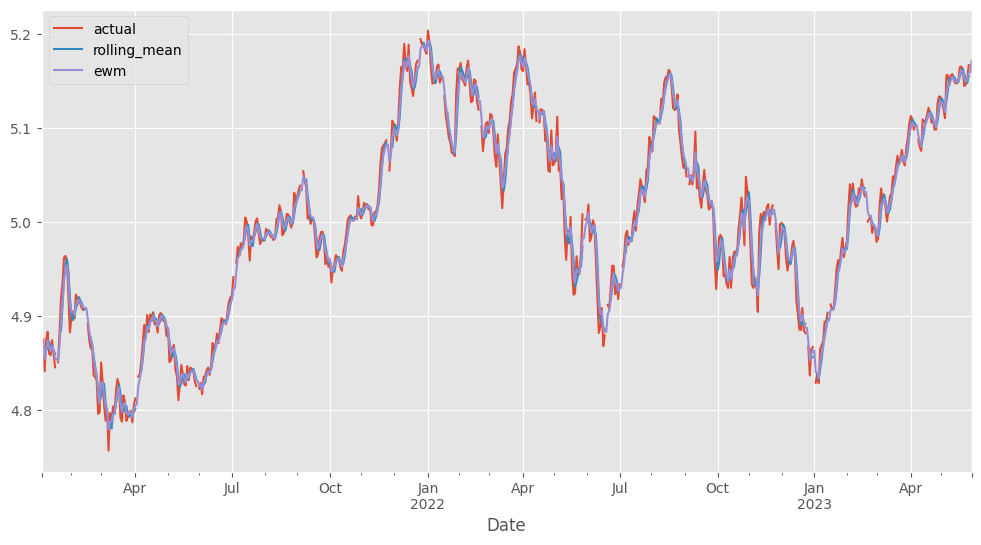

In [19]:
y_rolling.plot()

In [20]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(y.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.079731
p-value: 0.252742


In [21]:
diff = pd.DataFrame({"actual": y, "diff1": y.diff(3)}).head(10)
diff["diff2"] = diff.diff1.diff(1)
diff

,actual,diff1,diff2
Date,,,
2021-01-04,4.862986,NaN,NaN
2021-01-05,4.875274,NaN,NaN
2021-01-06,4.841032,NaN,NaN
2021-01-07,4.874586,0.011601,NaN
2021-01-08,4.883181,0.007907,-0.003694
2021-01-11,4.859657,0.018625,0.010718
2021-01-12,4.858261,-0.016326,-0.034950
2021-01-13,4.874357,-0.008823,0.007502
2021-01-14,4.859115,-0.000543,0.008281


In [22]:
result = adfuller(y.diff(periods=1).dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.477748
p-value: 0.000000


<Axes: xlabel='Date'>

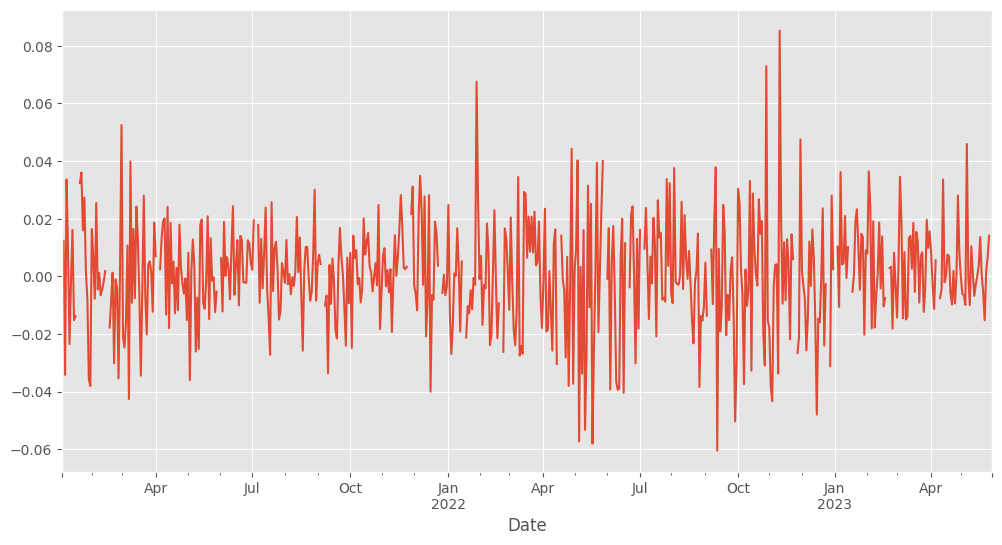

In [23]:
y.diff(periods=1).plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

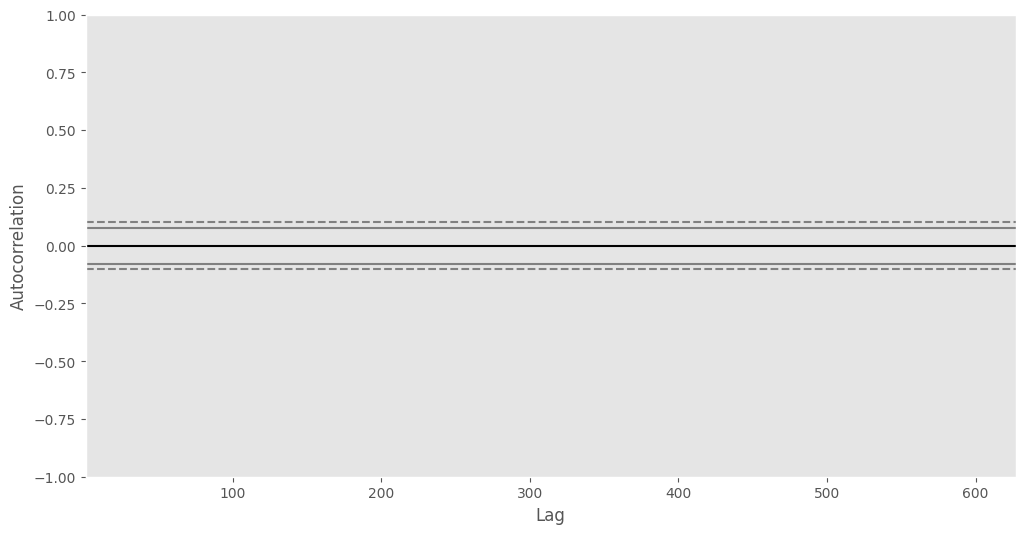

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y)

In [25]:
y = y.dropna()

In [26]:
from statsmodels.tsa.arima.model import ARIMA


In [27]:
model = ARIMA(y, order=(5, 1, 0))
model_fit = model.fit()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                0
count  605.000000
mean     0.008604
std      0.198557
min     -0.058386
25%     -0.010025
50%      0.000599
75%      0.012724
max      4.862986


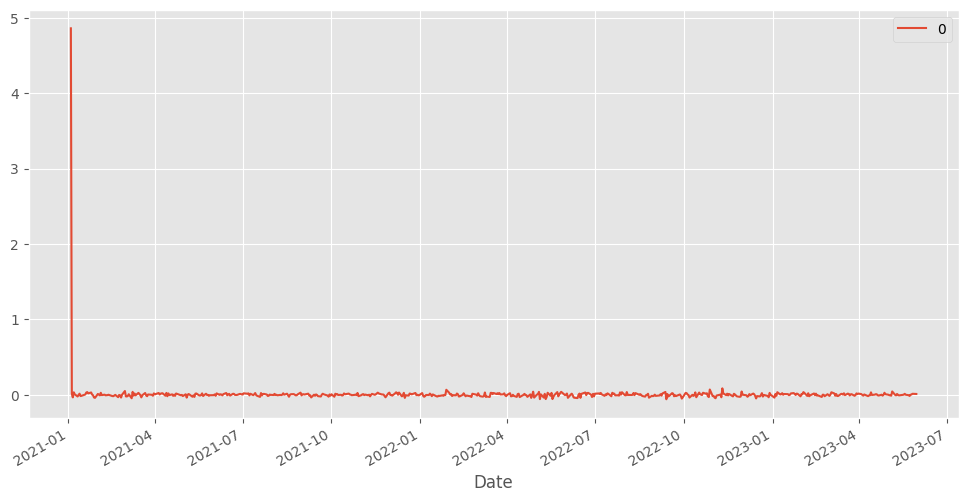

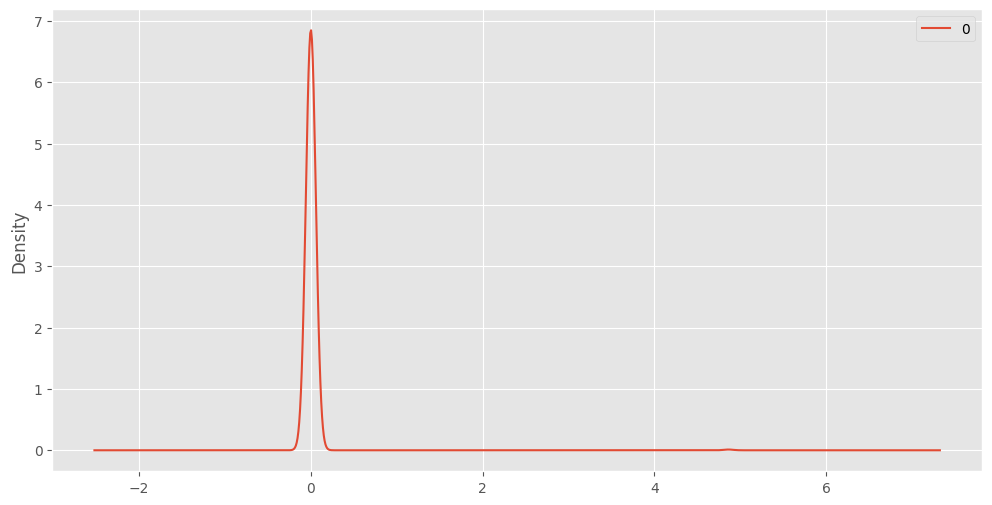

In [28]:
# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  605
Model:                 ARIMA(5, 1, 0)   Log Likelihood                1549.926
Date:                Fri, 14 Jul 2023   AIC                          -3087.851
Time:                        00:14:51   BIC                          -3061.430
Sample:                             0   HQIC                         -3077.569
                                - 605                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0225      0.038     -0.601      0.548      -0.096       0.051
ar.L2         -0.0701      0.040     -1.735      0.083      -0.149       0.009
ar.L3         -0.0277      0.039     -0.701      0.483      -0.105       0.050
ar.L4          0.0009      0.036      0.025      0.980      -0.069       0.071
ar.L5          0.0244      0.034      0.724      0.469      -0.042       0.090
sigma2         0.0003   1.66e-05     20.785      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                35.95
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

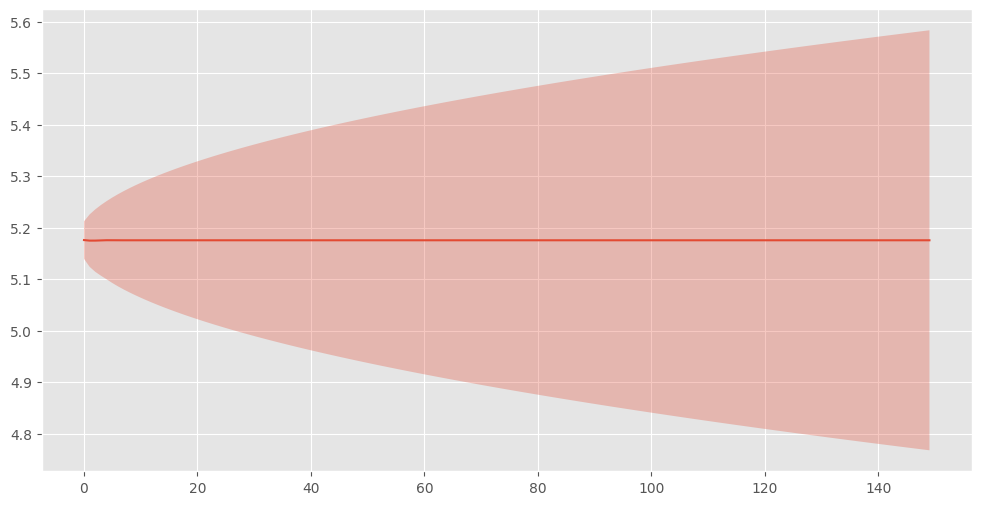

In [30]:
model = ARIMA(y.values, order=(5, 1, 0))
model_fit = model.fit()
forecast_length = 150
forecast = model_fit.get_forecast(steps=forecast_length)
predictions = forecast.predicted_mean
conf_interval = forecast.conf_int()

plt.plot(predictions)
plt.fill_between(range(len(predictions)), conf_interval[:, 0], conf_interval[:, 1], alpha=0.3)



In [31]:
predictions[:10]

array([5.17606737, 5.17502274, 5.17505274, 5.17552541, 5.17579843,
       5.17571408, 5.17565834, 5.17565911, 5.17567711, 5.17568477])

In [32]:
model = ARIMA(y.values, order=(5, 1, 0))
model_fit = model.fit()
forecast_length = 150
forecast = model_fit.get_forecast(steps=forecast_length)
predictions = forecast.predicted_mean
actual_values = y[-forecast_length:]  # Assuming you have the actual values for comparison

forecast_errors = actual_values - predictions
print(forecast_errors[:10])

Date
2022-10-24   -0.169106
2022-10-25   -0.148908
2022-10-26   -0.168760
2022-10-27   -0.200172
2022-10-28   -0.127610
2022-10-31   -0.143056
2022-11-01   -0.160699
2022-11-02   -0.198719
2022-11-03   -0.242067
2022-11-04   -0.245681
Name: Close, dtype: float64


In [33]:
conf_interval[:10]

array([[5.13963847, 5.21249627],
       [5.12408187, 5.22596361],
       [5.11431713, 5.23578835],
       [5.10679119, 5.24425964],
       [5.09979616, 5.25180069],
       [5.09267724, 5.25875093],
       [5.08615228, 5.2651644 ],
       [5.08016969, 5.27114854],
       [5.07457214, 5.27678207],
       [5.06925424, 5.2821153 ]])

In [34]:
model.endog

array([[4.86298569],
       [4.87527361],
       [4.8410325 ],
       [4.87458644],
       [4.88318066],
       [4.85965732],
       [4.85826084],
       [4.87435727],
       [4.85911451],
       [4.84528884],
       [4.85070127],
       [4.88302916],
       [4.91903153],
       [4.93497746],
       [4.96228502],
       [4.96396291],
       [4.95624949],
       [4.92063762],
       [4.8824989 ],
       [4.89888403],
       [4.90520074],
       [4.89739196],
       [4.92282359],
       [4.91822752],
       [4.9193238 ],
       [4.91272837],
       [4.9081595 ],
       [4.90623731],
       [4.90801173],
       [4.8917767 ],
       [4.87397517],
       [4.86530124],
       [4.86653391],
       [4.83628191],
       [4.83517018],
       [4.83110981],
       [4.79570788],
       [4.79793702],
       [4.8503883 ],
       [4.8292733 ],
       [4.80451271],
       [4.78857447],
       [4.79925559],
       [4.75668884],
       [4.79653404],
       [4.78732509],
       [4.80369311],
       [4.796

In [35]:
(predictions + 1.96 * forecast_errors)[:10]

Date
2022-10-24    4.844621
2022-10-25    4.883163
2022-10-26    4.844283
2022-10-27    4.783188
2022-10-28    4.925682
2022-10-31    4.895323
2022-11-01    4.860688
2022-11-02    4.786171
2022-11-03    4.701226
2022-11-04    4.694150
Name: Close, dtype: float64

In [36]:
(predictions - 1.96 * forecast_errors)[:10]

Date
2022-10-24    5.507514
2022-10-25    5.466882
2022-10-26    5.505823
2022-10-27    5.567862
2022-10-28    5.425915
2022-10-31    5.456105
2022-11-01    5.490629
2022-11-02    5.565147
2022-11-03    5.650128
2022-11-04    5.657220
Name: Close, dtype: float64

predicted=5.050929, actual=5.039935
predicted=5.038614, actual=5.058600
predicted=5.057932, actual=5.096385
predicted=5.096618, actual=5.035913
predicted=5.033854, actual=5.045423
predicted=5.048352, actual=5.026312
predicted=5.031221, actual=5.015291
predicted=5.010984, actual=5.040065
predicted=5.041358, actual=5.055609
predicted=5.053389, actual=5.035133
predicted=5.033495, actual=5.028737
predicted=5.031014, actual=5.013498
predicted=5.015484, actual=5.015756
predicted=5.015193, actual=5.022300
predicted=5.022358, actual=5.009568
predicted=5.008509, actual=4.959202
predicted=4.960419, actual=4.928702
predicted=4.931800, actual=4.958991
predicted=4.960858, actual=4.984291
predicted=4.980039, actual=4.986343
predicted=4.981644, actual=4.979695
predicted=4.980393, actual=4.942285
predicted=4.944669, actual=4.944638
predicted=4.947421, actual=4.934330
predicted=4.935763, actual=4.929714
predicted=4.928011, actual=4.962775
predicted=4.963046, actual=4.930004
predicted=4.928453, actual=4

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4.965331, actual=4.948334
predicted=4.950809, actual=4.960394
predicted=4.961651, actual=4.956953
predicted=4.955812, actual=4.973210
predicted=4.971430, actual=4.979970
predicted=4.978685, actual=4.964312
predicted=4.963971, actual=4.916325
predicted=4.918871, actual=4.901639
predicted=4.906614, actual=4.885601
predicted=4.888664, actual=4.885072
predicted=4.885308, actual=4.908603
predicted=4.907631, actual=4.884543
predicted=4.882915, actual=4.881741
predicted=4.882109, actual=4.867765
predicted=4.869682, actual=4.836599
predicted=4.838609, actual=4.864530
predicted=4.865661, actual=4.866996
predicted=4.865953, actual=4.828874
predicted=4.828025, actual=4.839135
predicted=4.840935, actual=4.828474
predicted=4.830108, actual=4.864607
predicted=4.863548, actual=4.868688
predicted=4.865119, actual=4.873134
predicted=4.871669, actual=4.894027
predicted=4.892874, actual=4.893427
predicted=4.893261, actual=4.903495
predicted=4.902767, actual=4.912214
predicted=4.911670, actual=4

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4.907410, actual=4.926311
predicted=4.926351, actual=4.949540
predicted=4.947917, actual=4.959552
predicted=4.956994, actual=4.954841
predicted=4.953825, actual=4.969536
predicted=4.970233, actual=4.983127
predicted=4.983082, actual=4.962845
predicted=4.962422, actual=4.971825
predicted=4.972536, actual=4.979695
predicted=4.980169, actual=5.016087
predicted=5.014657, actual=5.040194
predicted=5.036361, actual=5.022103
predicted=5.020392, actual=5.041164
predicted=5.042098, actual=5.023354
predicted=5.025055, actual=5.016419
predicted=5.018147, actual=5.017346
predicted=5.017580, actual=5.035978
predicted=5.036271, actual=5.031744
predicted=5.029812, actual=5.045552
predicted=5.044651, actual=5.035068
predicted=5.034842, actual=5.027492
predicted=5.028687, actual=5.000450
predicted=5.001913, actual=5.003342
predicted=5.005590, actual=5.006627
predicted=5.006723, actual=4.988458
predicted=4.988056, actual=4.996672
predicted=4.996433, actual=4.993218
predicted=4.993472, actual=4

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.127271, actual=5.120685
predicted=5.122009, actual=5.110722
predicted=5.111716, actual=5.156581
predicted=5.156312, actual=5.156178
predicted=5.153186, actual=5.146156
predicted=5.144941, actual=5.156523


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.156834, actual=5.157617
predicted=5.158316, actual=5.150803
predicted=5.150595, actual=5.147901
predicted=5.148205, actual=5.147901
predicted=5.148531, actual=5.151498
predicted=5.151493, actual=5.165072
predicted=5.164322, actual=5.165700
predicted=5.164576, actual=5.160204


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.159951, actual=5.144933
predicted=5.145777, actual=5.146564
predicted=5.148075, actual=5.153234
predicted=5.153374, actual=5.167240
predicted=5.166237, actual=5.177843
Test RMSE: 0.020


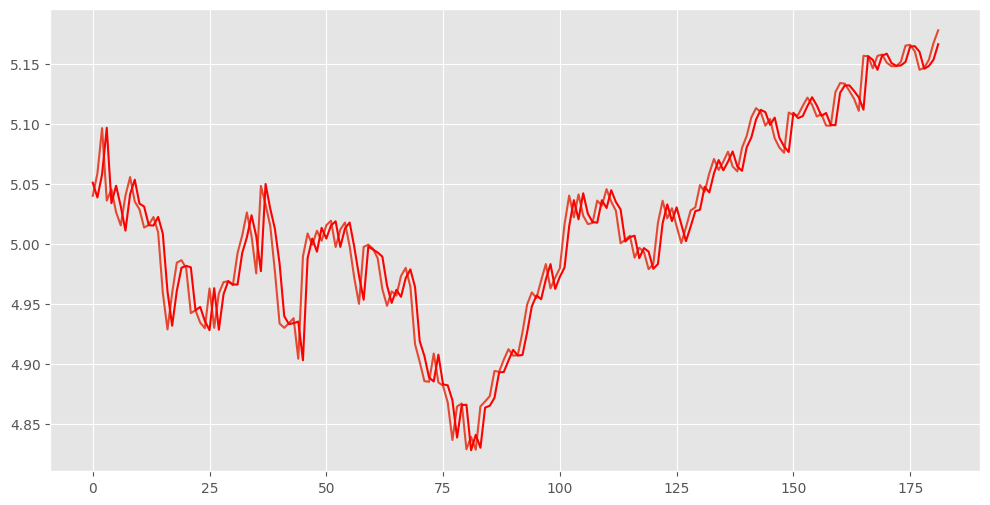

In [37]:
from sklearn.metrics import mean_squared_error

x = y.values
train_size = int(len(x) * 0.7)
train, test = x[0:train_size], x[train_size:]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]  # Remove the unnecessary [0] index access
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, actual=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse_arima=  np.sqrt(error)
print('Test RMSE: %.3f' % rmse_arima)

plt.plot(test)
plt.plot(predictions, color='red')


In [38]:
result = pd.DataFrame(y)[train_size:]
result.columns = ["actual"]
result["prediction"] = predictions
result

,actual,prediction
Date,,
2022-09-08,5.039935,5.050929
2022-09-09,5.058600,5.038614
2022-09-12,5.096385,5.057932
2022-09-13,5.035913,5.096618
2022-09-14,5.045423,5.033854
...,...,...
2023-05-23,5.144933,5.159951
2023-05-24,5.146564,5.145777
2023-05-25,5.153234,5.148075


# **LSTM**

In [39]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

df = yf.download('AAPL', start='2021-01-01', end='2023-5-03')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.503624,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.080093,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.735039,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.991379,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.104752,105158200


In [40]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-26,163.059998,165.279999,162.800003,163.759995,163.533798,45498800
2023-04-27,165.190002,168.559998,165.190002,168.410004,168.177383,64902300
2023-04-28,168.490005,169.850006,167.880005,169.679993,169.445618,55209200
2023-05-01,169.279999,170.449997,168.639999,169.589996,169.355743,52472900
2023-05-02,170.089996,170.350006,167.539993,168.539993,168.307190,48425700


Text(0, 0.5, 'Prices ($)')

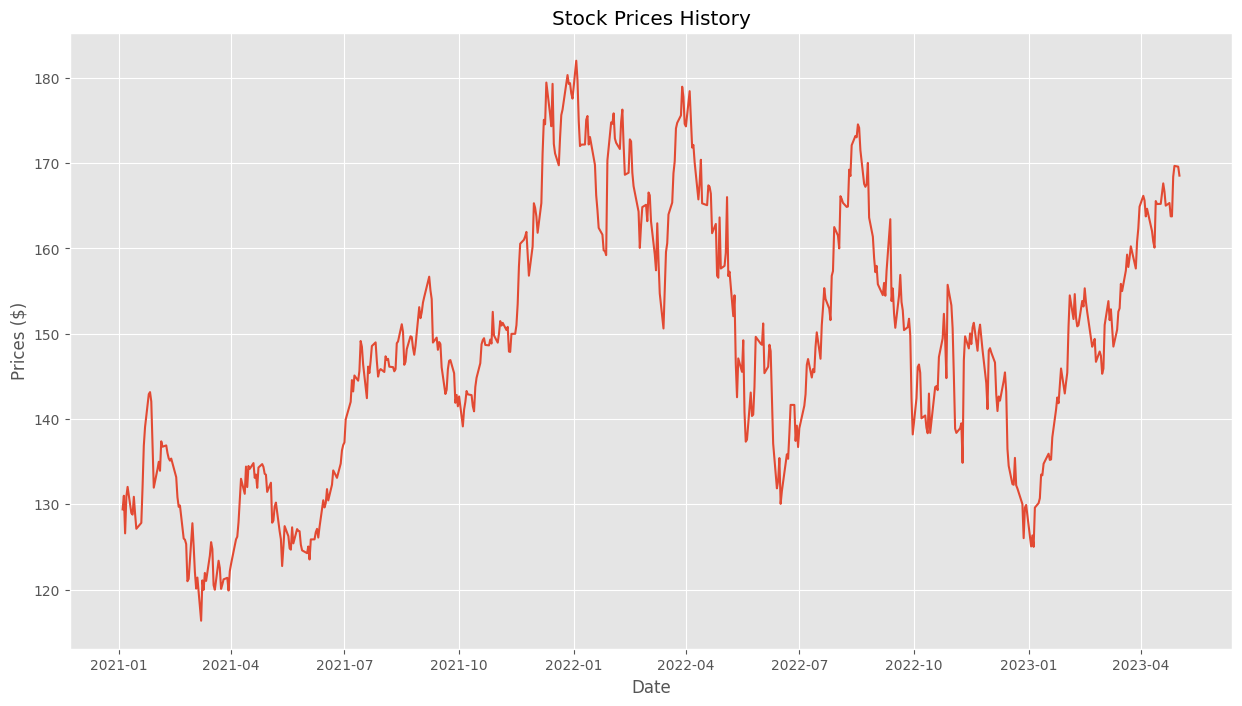

In [41]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [42]:
close_prices = df['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [43]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [44]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=2)

Epoch 1/2
409/409 [==============================] - 11s 20ms/step - loss: 0.0132
Epoch 2/2
409/409 [==============================] - 8s 20ms/step - loss: 0.0052


In [46]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse_lstm = np.sqrt(np.mean(predictions - y_test)**2)
rmse_lstm

4/4 [==============================] - 1s 16ms/step


4.264297159309061

<ipython-input-47-d4202c9d2279>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


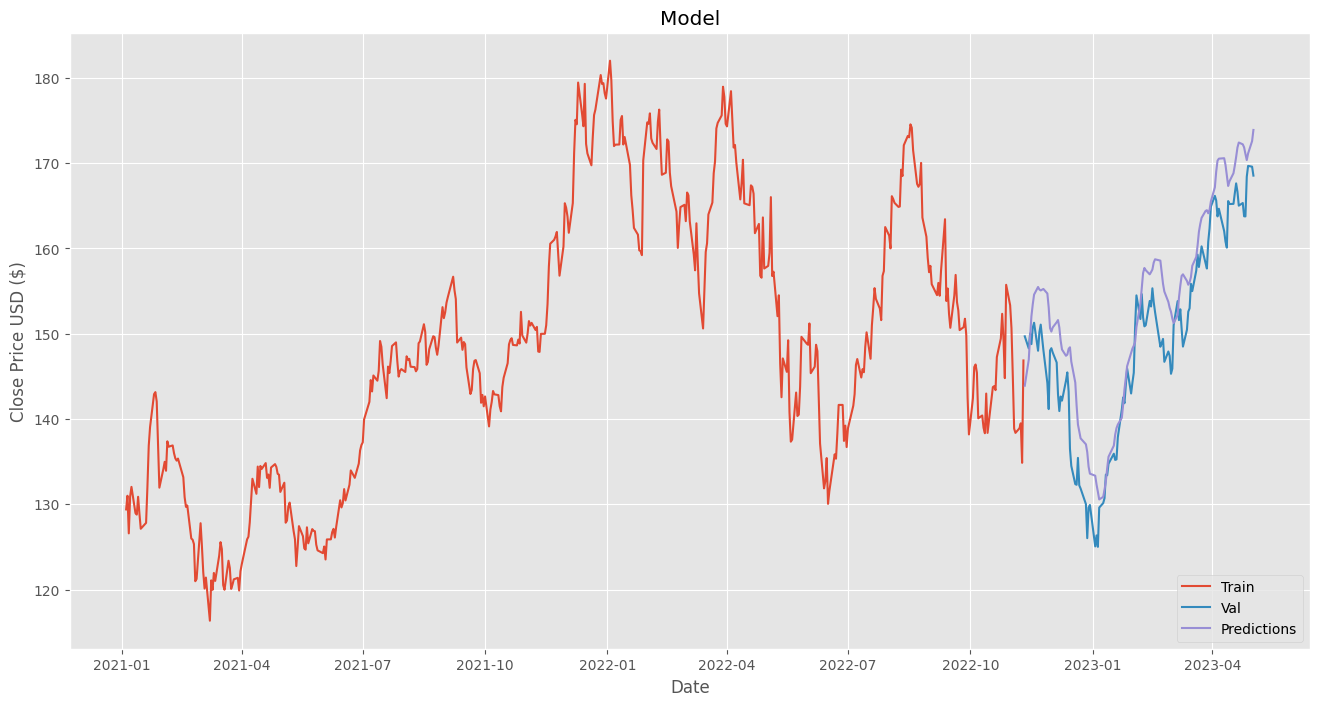

In [47]:

data = df.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<ipython-input-48-d89fe5ac858b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


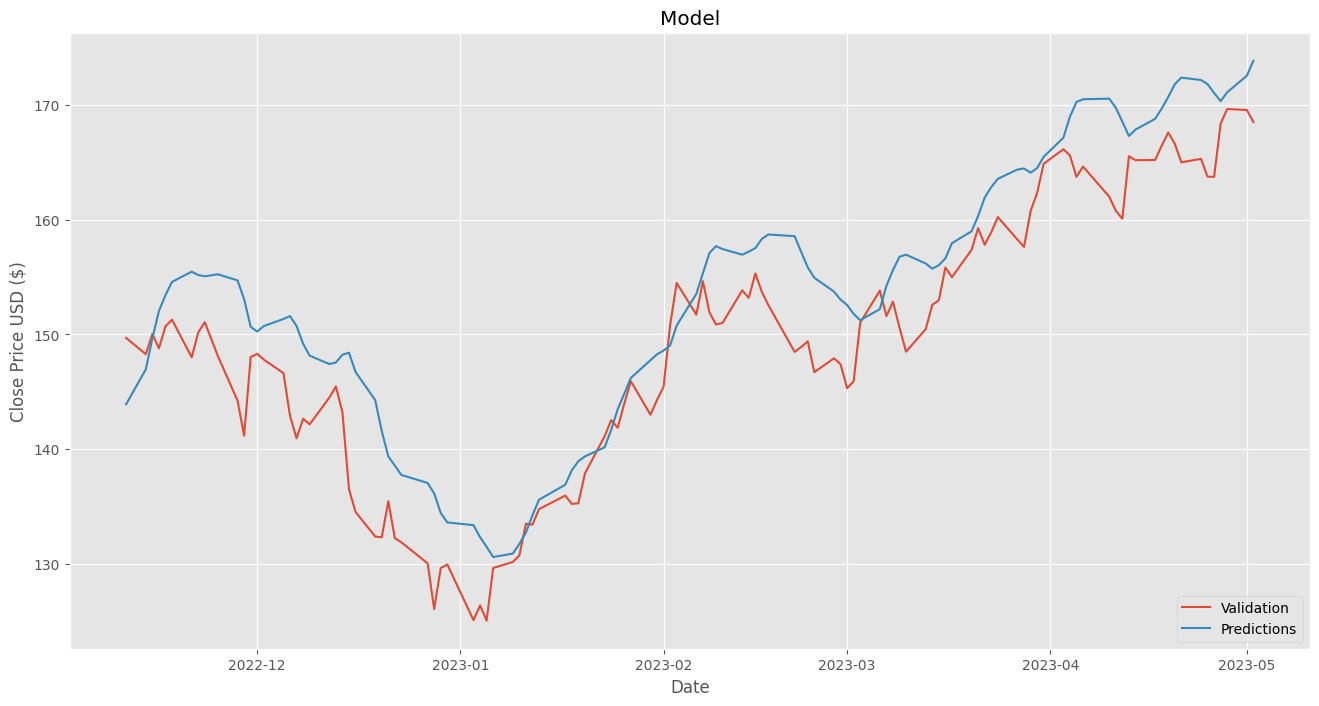

In [48]:
data = df.filter(['Close'])
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Validation', 'Predictions'], loc='lower right')
plt.show()


# **COMPARATIVE ANALYSIS**

In [49]:

print("ARIMA RMSE:", rmse_arima)
print("LSTM RMSE:", rmse_lstm)

ARIMA RMSE: 0.02007107205367914
LSTM RMSE: 4.264297159309061
